In [10]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [11]:
# config paramters
input_train_size = 100
validation_size = 100
window = 10
epochs = 21

In [12]:
df = torch.linspace(0,input_train_size, steps=100)
df = torch.sin(df)

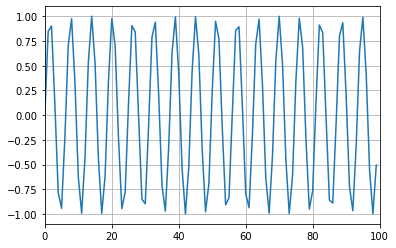

In [13]:
plt.figure()
plt.xlim(0, input_train_size)
plt.grid(True)
plt.plot(df.numpy())

In [14]:
train = []
for i in range(len(df)-window):
    train.append((df[i:i+window],df[i+window:i+window+1]) ) # smart way to prevent index out of bounds exception

In [15]:
class LSTM_model(nn.Module):
    def __init__(self,input_dim = 1, hs = 16, output_dim = 1):
        super().__init__()
        self.hs = hs
        self.hidden = (torch.zeros(1,1,hs), torch.zeros(1,1,hs))
        self.lstm = nn.LSTM(input_dim, hs)
        self.out = nn.Linear(hs,output_dim)

    def forward(self, x):
        lstm_out, self.hidden = self.lstm(x.view(len(x), 1, -1), self.hidden)
        pred = self.out(lstm_out.view(len(x),-1))
        return pred[-1]

In [16]:
torch.manual_seed(12345)
model = LSTM_model()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [17]:
preds = []

for i in range(epochs):
    for x, y in train:
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hs), torch.zeros(1,1,model.hs))
        y_pred = model(x)
        if i+1 == epochs:
            preds.append(y.item())
        loss = criterion(y_pred, y)
        loss.backward()
        optimizer.step()
    if i%10 == 0:
        print(f'Epoch: {i:2} Loss: {loss.item():10.8f}')

Epoch:  0 Loss: 0.13153669
Epoch: 10 Loss: 0.00002034
Epoch: 20 Loss: 0.00000146


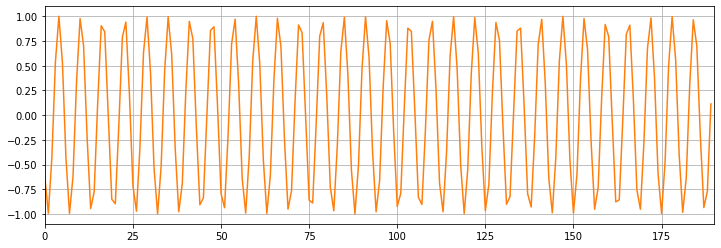

In [18]:
preds = preds[0:input_train_size]
for i in range(input_train_size, input_train_size+validation_size):
    x = torch.FloatTensor(preds[-window:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1,1,model.hs),torch.zeros(1,1,model.hs))
        preds.append(model(x).item())

plt.figure(figsize=(12,4))
plt.xlim(0,input_train_size+validation_size-window)
plt.grid(True)
plt.plot(y.numpy())
plt.plot(range(0, input_train_size+validation_size-window),preds)
plt.show()